# Data analysis of IPL( Till 2019)

###### IMPORT ALL RELATED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
sns.set_style("dark")


In [2]:
df = pd.read_csv('matches.csv')

In [3]:
df.head()
df.shape

(756, 18)

In [4]:
#checking null values in our dataframe
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
#removing unwanted columns
#if removed once can not be called back
df.drop('umpire3',axis=1,inplace=True)
df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


<AxesSubplot:>

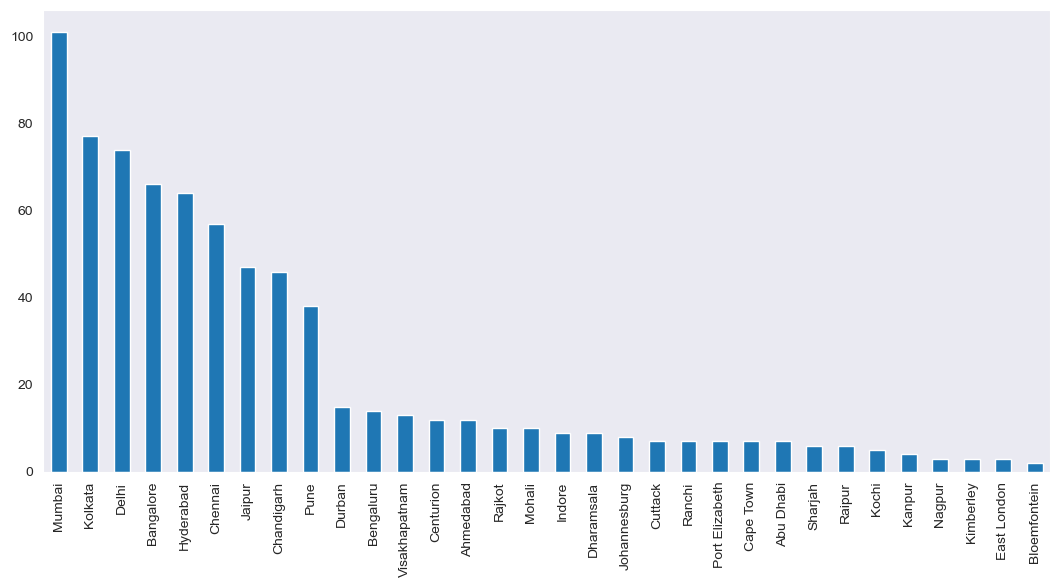

In [7]:
plt.figure(figsize=(13,6))

df['city'].value_counts().plot(kind = 'bar')
#best representationis given by bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

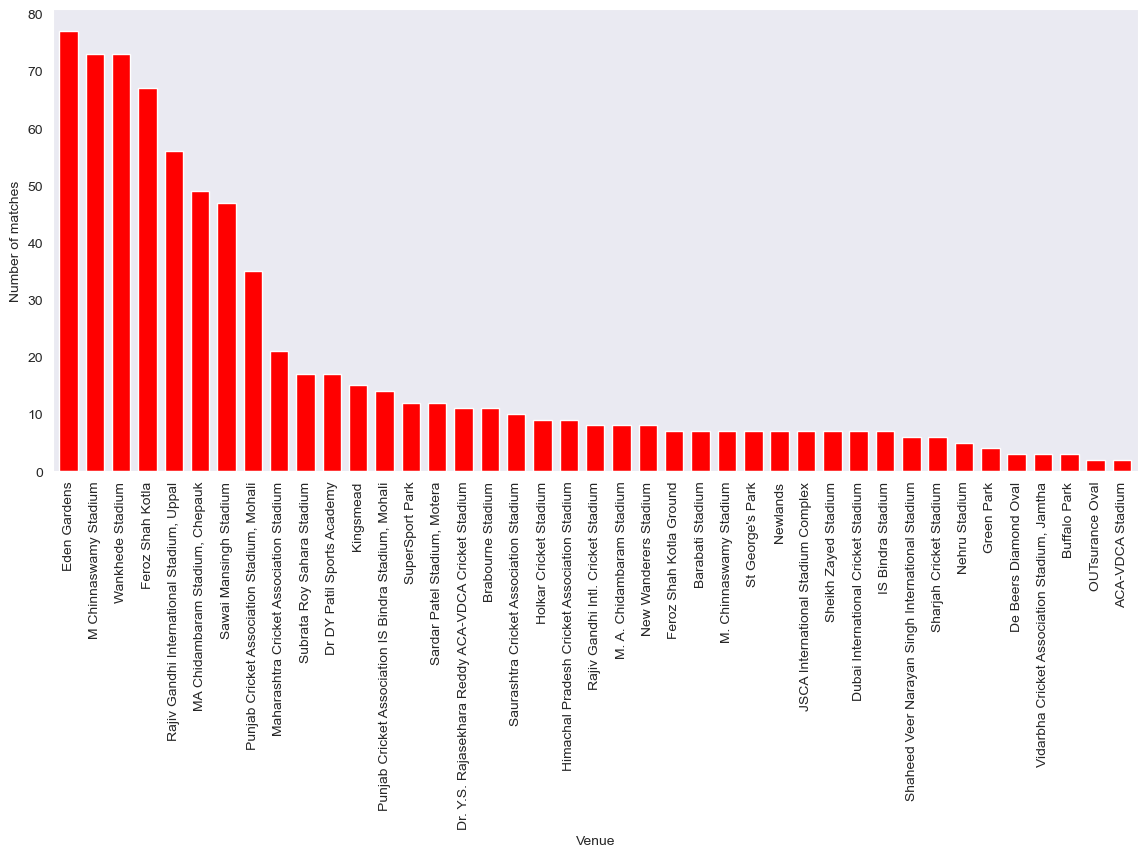

In [8]:
plt.figure(figsize=(14,6))
df['venue'].value_counts().plot.bar(width=0.7,color='red')
plt.xlabel('Venue')
plt.xticks(rotation = 90)
plt.ylabel('Number of matches')
plt.show

### Top Winning Teams

Text(0.5, 1.0, 'Top WInning Teams')

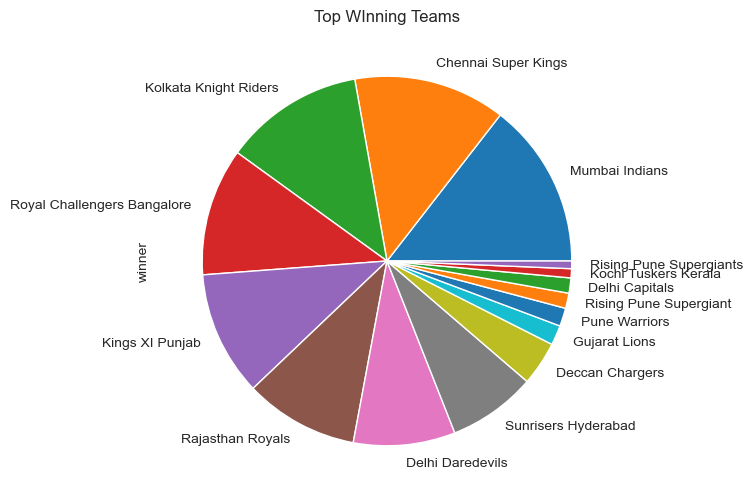

In [9]:
plt.figure(figsize = (8,6))
df['winner'].value_counts().plot(kind='pie')
plt.title("Top WInning Teams")

Text(0.5, 1.0, 'Top Winning Teams')

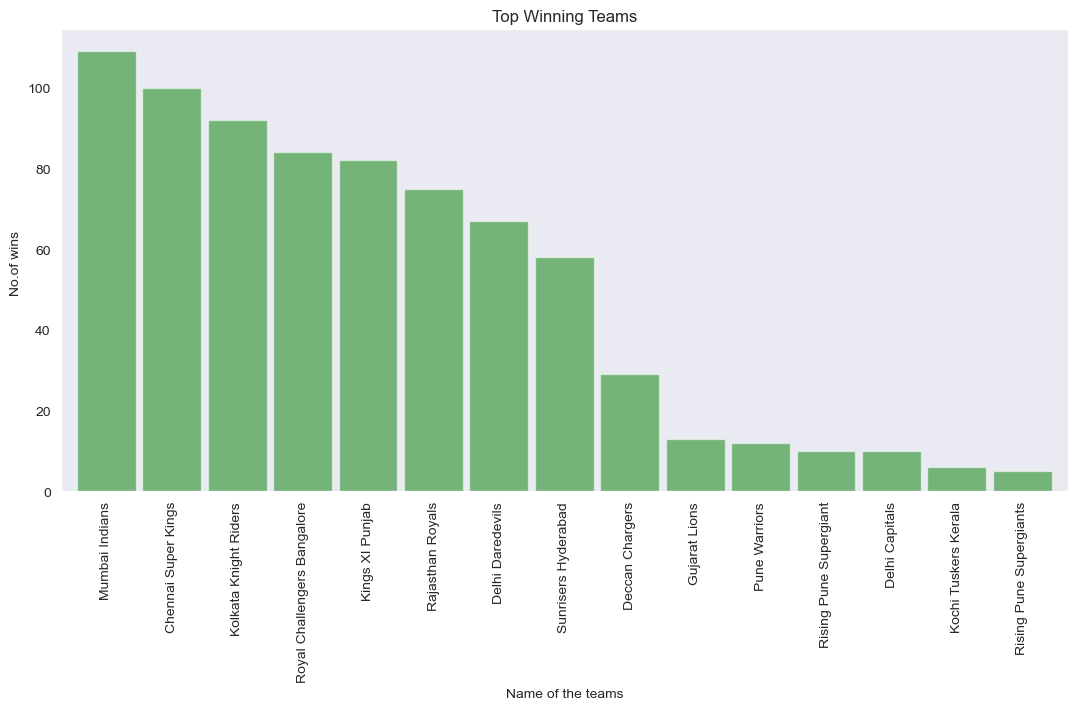

In [10]:
plt.figure(figsize = (13,6))
df['winner'].value_counts().plot(kind = 'bar', width = 0.9, color = 'green', alpha = 0.5)
plt.xlabel("Name of the teams")
plt.ylabel("No.of wins ")
plt.title("Top Winning Teams")

## Top 25 Player of Match

<AxesSubplot:>

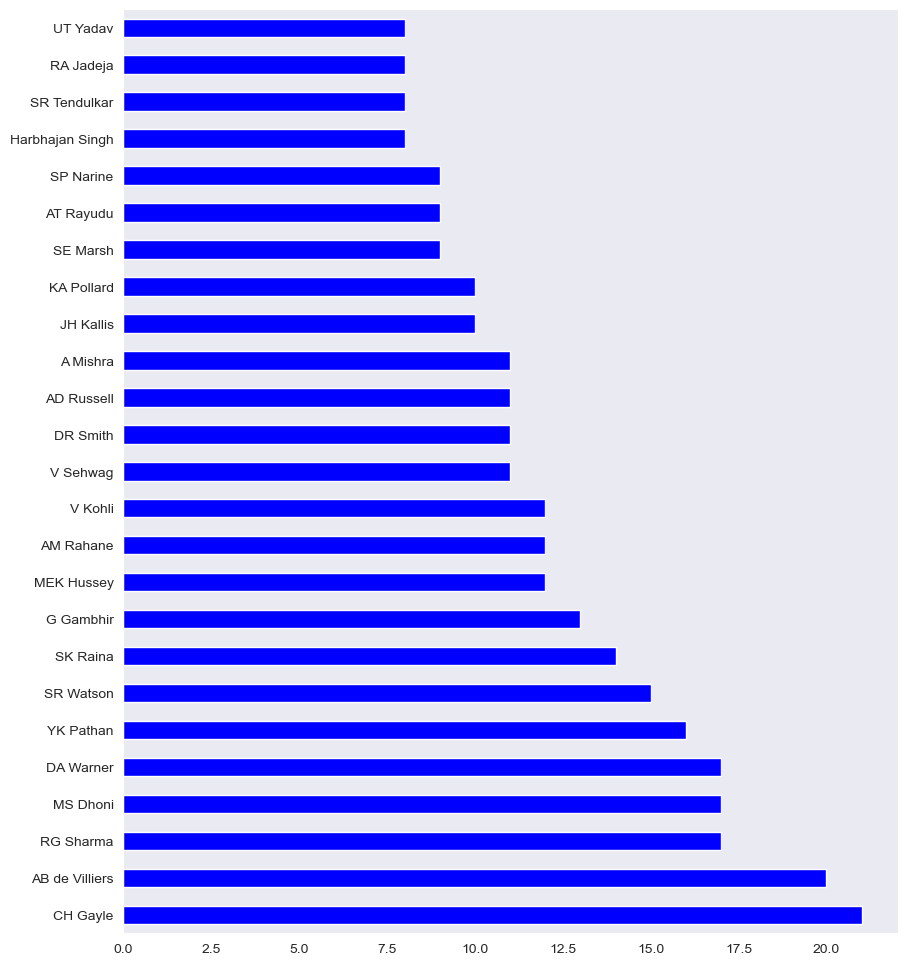

In [11]:
plt.figure(figsize = (10,12))
df['player_of_match'].value_counts()[:25].plot(kind = 'barh' , color='blue')

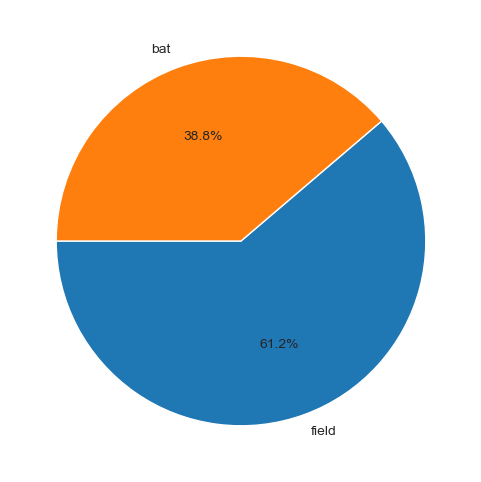

In [12]:
plt.figure(figsize=(14,6))
plt.pie(df['toss_decision'].value_counts(), labels=df['toss_decision'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

## Match Winners = Toss Winners

<AxesSubplot:>

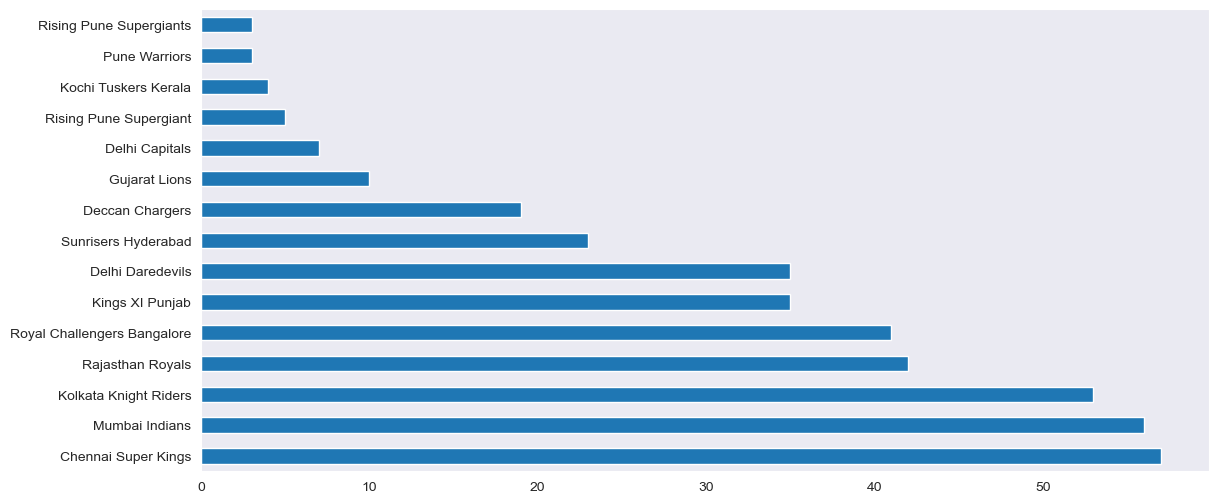

In [13]:
plt.figure(figsize = (13,6))
df.loc[df.toss_winner == df.winner, 'winner'].value_counts().plot(kind = 'barh')

<AxesSubplot:ylabel='Frequency'>

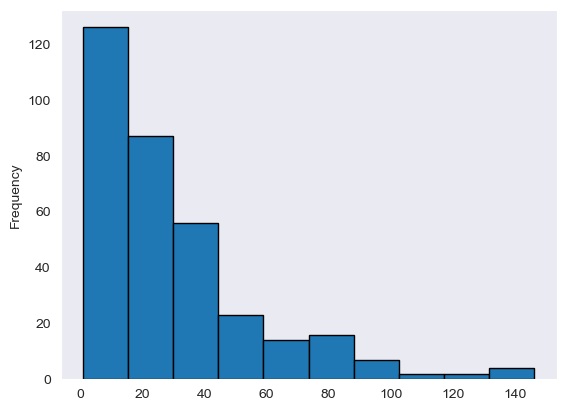

In [14]:
match_win_runs = df[df['win_by_runs'] != 0]
match_win_runs['win_by_runs'].plot(kind = 'hist', edgecolor = 'black')

### It shown from the graph Most of the matches has won between 0-15 runs

In [15]:
players_df=pd.read_excel('Players.xlsx')
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


## Number of players from each Country

C:\Users\NAROTTAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'England'),
  Text(2, 0, 'South Africa'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'Sri Lanka'),
  Text(6, 0, 'West Indies'),
  Text(7, 0, 'New Zealand'),
  Text(8, 0, 'Pakistan'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Zimbabwea')])

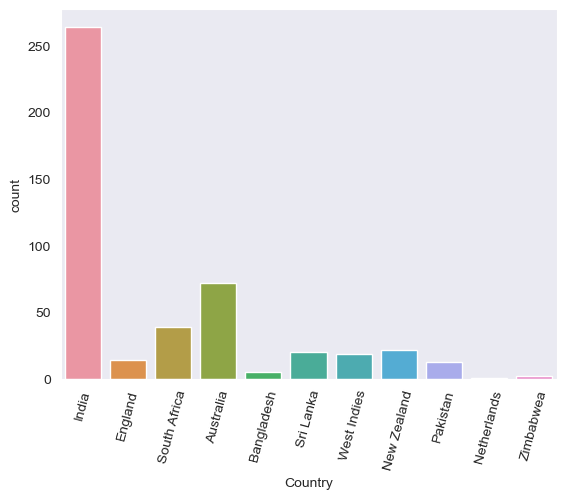

In [16]:
sns.countplot(players_df['Country'])
plt.xticks(rotation=75)

## Variaties of players

In [17]:
players_df['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', nan, 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler', 'Right-arm Medium',
       'Right-arm Fast'], dtype=object)

## Analysis Of Batsmans

In [18]:
bat_df = pd.read_csv('most_runs_average_strikerate.csv')
bat_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


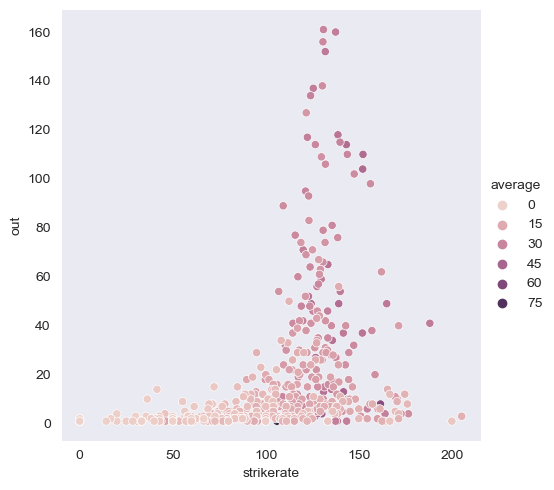

In [19]:
sns.relplot(x="strikerate" , hue = "average" , y = "out" ,data = bat_df , )

## Who is the highest run scorer of all seasons 

C:\Users\NAROTTAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'S Dhawan'),
  Text(5, 0, 'CH Gayle'),
  Text(6, 0, 'MS Dhoni'),
  Text(7, 0, 'RV Uthappa'),
  Text(8, 0, 'AB de Villiers'),
  Text(9, 0, 'G Gambhir'),
  Text(10, 0, 'AM Rahane'),
  Text(11, 0, 'KD Karthik'),
  Text(12, 0, 'SR Watson'),
  Text(13, 0, 'AT Rayudu'),
  Text(14, 0, 'YK Pathan'),
  Text(15, 0, 'BB McCullum'),
  Text(16, 0, 'PA Patel'),
  Text(17, 0, 'MK Pandey'),
  Text(18, 0, 'KA Pollard'),
  Text(19, 0, 'Yuvraj Singh')])

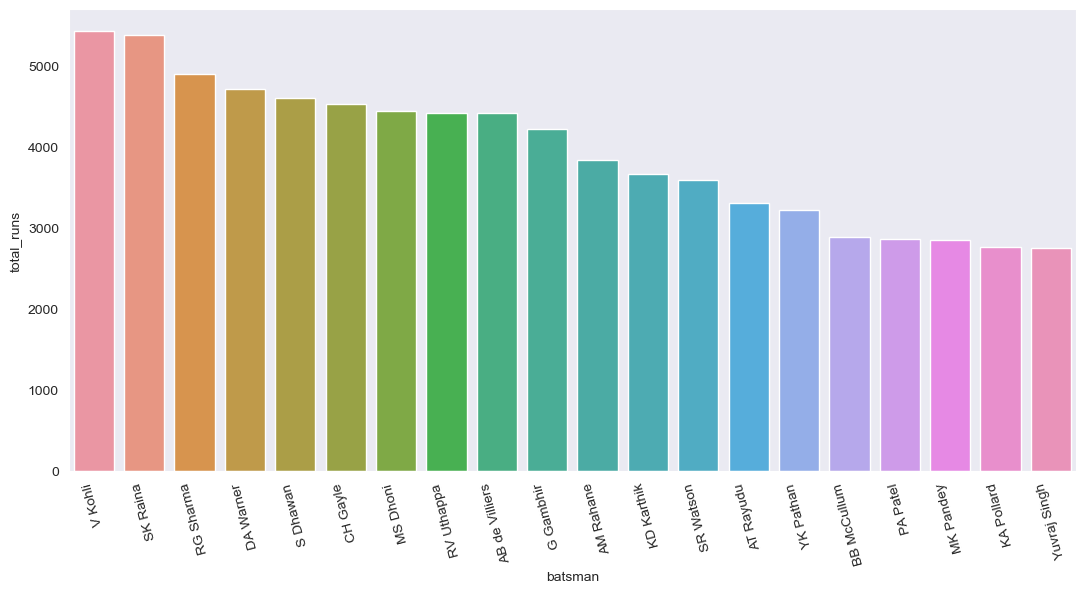

In [20]:
plt.figure(figsize = (13,6))
sns.barplot('batsman' , 'total_runs',data=bat_df.head(20))
plt.xticks(rotation=105)

## Which batsman has highest strike rate ?

In [21]:
bat_df[bat_df.total_runs>1500 ] #should have scored more than 1500 runs

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


C:\Users\NAROTTAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'RR Pant'),
  Text(1, 0, 'V Sehwag'),
  Text(2, 0, 'CH Gayle'),
  Text(3, 0, 'AB de Villiers'),
  Text(4, 0, 'KA Pollard'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'DA Warner'),
  Text(7, 0, 'DA Miller'),
  Text(8, 0, 'SR Watson'),
  Text(9, 0, 'KL Rahul'),
  Text(10, 0, 'MS Dhoni'),
  Text(11, 0, 'AC Gilchrist'),
  Text(12, 0, 'SK Raina'),
  Text(13, 0, 'DR Smith'),
  Text(14, 0, 'SE Marsh'),
  Text(15, 0, 'BB McCullum'),
  Text(16, 0, 'V Kohli'),
  Text(17, 0, 'WP Saha'),
  Text(18, 0, 'RG Sharma'),
  Text(19, 0, 'SV Samson'),
  Text(20, 0, 'RV Uthappa'),
  Text(21, 0, 'AJ Finch'),
  Text(22, 0, 'KD Karthik'),
  Text(23, 0, 'Yuvraj Singh'),
  Text(24, 0, 'SPD Smith')])

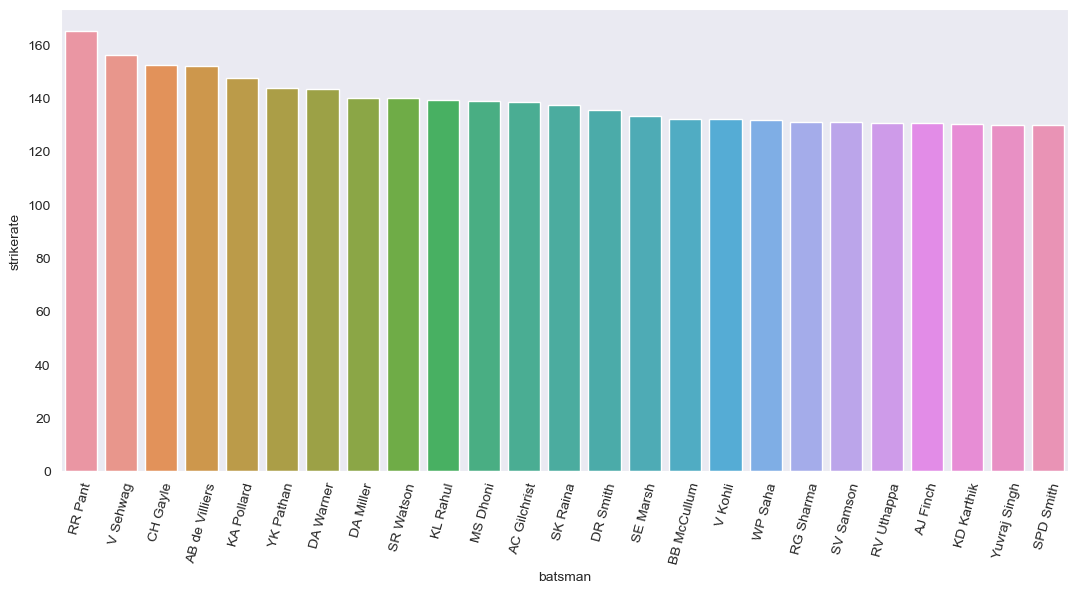

In [22]:
plt.figure(figsize=(13,6))
sns.barplot('batsman' , 'strikerate' , data= bat_df[bat_df.total_runs>1500].sort_values('strikerate',ascending = False).head(25))
plt.xticks(rotation=75)

## Extraction the records when team won by batting second

<AxesSubplot:ylabel='Frequency'>

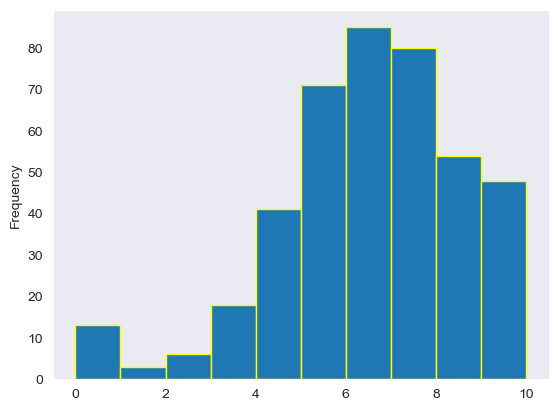

In [23]:
win_match_wicket = df[df['win_by_runs']==0]
win_match_wicket['win_by_wickets'].plot(kind ='hist',edgecolor='yellow')

#### Most of the matches has won by 7 wickets

## Top 5 Winning Teams Head-On Performance

In [24]:
df['winner'].value_counts()[:5]

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: winner, dtype: int64

#### Checking MI vs CSK

In [25]:
df.loc[(df["team1"]=="Channai Super Kings") & (df["team2"]=="Mumbai Indians"),'winner'].value_counts()
df.loc[(df["team1"]=="Mumbai Indians") & (df["team2"]=="Chennai Super Kings"),'winner'].value_counts()

Mumbai Indians         10
Chennai Super Kings     6
Name: winner, dtype: int64

##### So , MI is better in MI vs CSK

## SIMILARLY CHECKING ALL THE PARAMETERS AND CROSS PAIRS WE CONCLUDE THAT

### Mumbai Indian has the highest match winning team and good team in all condition like winning ratio , head to head performance , toss winning in the IPL